In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("cleaned_data.csv")
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


### storing data in new file to keep base data as sample

In [3]:
# data.to_csv("encoded.csv")

In [4]:
# df = pd.read_csv("encoded.csv")

In [3]:
df = data.copy()
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [8]:
# Separate features and target from the train dataset
X = df.drop(['loan_status'], axis=1)
Y = df['loan_status']

# display(X.head())
# display(Y.head())

# Split the data into training and validation sets (70% train, 10% validation, 20% testing)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp, test_size=2/3, random_state = 42)

## encoding

### binary and one-hot

In [9]:
step1 = ColumnTransformer([
    ('step1', OneHotEncoder(sparse_output=False, drop='first'), ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent','previous_loan_defaults_on_file']) 
    ], remainder='passthrough')

In [10]:
step2 = RandomForestClassifier(random_state=42)

In [11]:
pipe = Pipeline(steps = [('step1',step1),('step2',step2)])

In [12]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['person_gender',
                                                   'person_education',
                                                   'person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file'])])),
                ('step2', RandomForestClassifier(random_state=42))])

In [13]:
y_pred = pipe.predict(X_test)

In [14]:
accuracy = accuracy_score(Y_test, y_pred)

In [15]:
# accuracy	 = person_age	person_gender	person_education	person_income	person_emp_exp	person_home_ownership	loan_amnt	loan_intent	loan_int_rate	loan_percent_income	cb_person_cred_hist_length	credit_score	previous_loan_defaults_on_file	loan_status

In [16]:
input_data = pd.DataFrame([[21,'male','Master',150000,3,'RENT',50000,'PERSONAL',12.0,33,3.0,600,'Yes']],
                          columns=['person_age'	,'person_gender',	'person_education',	'person_income',	'person_emp_exp',	'person_home_ownership',	'loan_amnt',	'loan_intent',	'loan_int_rate',	'loan_percent_income',	'cb_person_cred_hist_length',	'credit_score',	'previous_loan_defaults_on_file'])

In [17]:
ans = pipe.predict(input_data)

In [18]:
print(ans[0])

if ans[0] == 0:
    print("Not Approved")
else: 
    print("Approved")

0
Not Approved


In [19]:
cm = confusion_matrix(Y_test, y_pred)

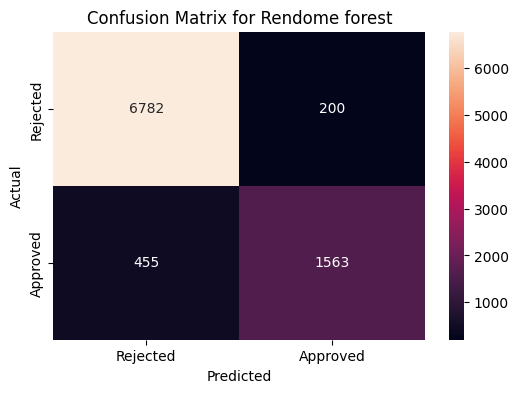

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title(f'Confusion Matrix for Rendome forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Use below part if it's needed for verification between multiple models only

In [ ]:
# # Binary Encoding -------------------------------->

# #for person_gender
# df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
# #for previous_loan_defaults_on_file
# df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

# # Ordinal Encoding for person_education (if applicable)
# education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 
#                    'Master': 4, 'Doctorate': 5}
# df['person_education'] = df['person_education'].map(education_order)


# # One-Hot Encoding -------------------------------->
# #for person_home_ownership and loan_intent
# df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

# df.head()Y_val, Y_val_pred

### Replace outliers with median

In [ ]:
# # Replacing Outliers with Median
# median_age = df['person_age'].median()
# df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)

In [ ]:
# column = 'person_age'
# title = column.replace('_', ' ')

In [ ]:
# print(f'\nSummary Statistics for {title}:\n', df[column].describe())

## correlation after encoding

In [21]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'female'

## Splitting of data set for testing

In [ ]:
# scaler = MinMaxScaler()
# model=scaler.fit(df)
# scaled_data=model.transform(df)

# print(scaled_data)

## applying algorythems

### Randomforest
### logistic reegression
### decision tree
### svm
### knn

In [ ]:
# models = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Support Vector Classifier": SVC(),
#     "K-Nearest Neighbors": KNeighborsClassifier()
# }

# results = []


In [ ]:
# for name, model in models.items():
#     model.fit(X_train, Y_train)
    
#     # Predictions on validation set
#     Y_val_pred = model.predict(X_val)
    
#     # Train and Test Scores
#     train_score = model.score(X_train, Y_train)
#     test_score = model.score(X_val, Y_val)
    
#     # Accuracy Score
#     accuracy = accuracy_score(Y_val, Y_val_pred)
    
#     results.append({
#         'Model': name,
#         'Train Score': train_score,
#         'Test Score': test_score,
#         'Accuracy Score': accuracy
#     })

#     # Classification report
#     print(f"Classification Report for {name}:\n")
#     print(classification_report(Y_val, Y_val_pred))
    
#     # Confusion Matrix
#     cm = confusion_matrix(Y_val, Y_val_pred)
    
#     # Plotting confusion matrix
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
#     plt.title(f'Confusion Matrix for {name}')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     print("\n" + "="*60 + "\n")

# results_df = pd.DataFrame(results)

# # Display the model performance table
# print("Model Performance Table:")
# display(results_df)